### Création d'un jeu de Morpion


Objectif :
* Développer un jeu de Morpion en Python où deux joueurs peuvent s'affronter.
* Utiliser NumPy pour représenter la grille de jeu et gérer les coups des joueurs.
* Utiliser Matplotlib (Pyplot) pour afficher la grille et les marques (X et O).


Fonctionnalités clés :
* Affichage de la grille :
* * Afficher une grille 3x3 représentant le plateau de jeu.
* * Utiliser Pyplot pour dessiner les lignes de la grille.
* Gestion des tours de jeu :
* * Alterner les tours entre les deux joueurs.
* * Demander au joueur courant de saisir les coordonnées de la case où il souhaite placer sa marque.
* * Vérifier si la case est valide (vide et dans les limites de la grille).
* * Placer la marque du joueur sur la grille (en utilisant NumPy pour mettre à jour la représentation interne de la grille).
* * Mettre à jour l'affichage de la grille avec la nouvelle marque.
* Détection de victoire :
* * Après chaque coup, vérifier si un joueur a gagné :
* * - Vérifier les lignes, les colonnes et les diagonales pour voir si trois marques identiques sont alignées.
* * Si un joueur a gagné, afficher un message de victoire et terminer la partie.
* Détection de match nul :
* * Si toutes les cases sont remplies et qu'aucun joueur n'a gagné, afficher un message de match nul et terminer la partie.


Fonctions suggérées :
* afficher_grille(grille):
* * Prend en entrée la grille de jeu représentée par un tableau NumPy.
* * Utiliser Pyplot pour dessiner la grille et afficher les marques (X et O) aux positions correspondantes.
* recuperer_coordonnees():
* * Demande au joueur de saisir les coordonnées de la case (ligne, colonne).
* * Gère les erreurs de saisie (coordonnées invalides, case déjà occupée).
* * Retourne les coordonnées valides sous forme d'un tuple (ligne, colonne).
* placer_marque(grille, ligne, colonne, joueur):
* * Prend en entrée la grille, les coordonnées et le joueur courant ('X' ou 'O').
* * Met à jour la grille en plaçant la marque du joueur à la position spécifiée.
* verifier_victoire(grille, joueur):
* * Vérifie si le joueur a gagné en alignant trois de ses marques.
* * Retourne True si le joueur a gagné, False sinon.
* verifier_match_nul(grille):
* * Vérifiez si toutes les cases de la grille sont remplies.
* * Retourne True si match nul, False sinon.


Gestion des inputs :
* Utiliser input() pour demander au joueur de saisir les coordonnées.
* Utiliser des blocs try-except pour gérer les erreurs de saisie (par exemple, si l'utilisateur entre des lettres au lieu de chiffres).
* Convertir les entrées en nombres entiers à l'aide de int().
* Valider les coordonnées pour s'assurer qu'elles sont dans les limites de la grille et que la case est vide.
Création des fonctions croix et rond :
* Dans la fonction afficher_grille, vous pouvez utiliser plt.text pour placer les symboles 'X' et 'O' aux coordonnées correspondantes sur la grille.
* Vous pouvez personnaliser la taille, la couleur et la police des symboles pour améliorer l'apparence du jeu.


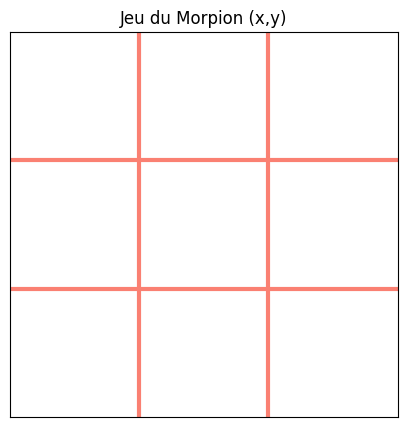

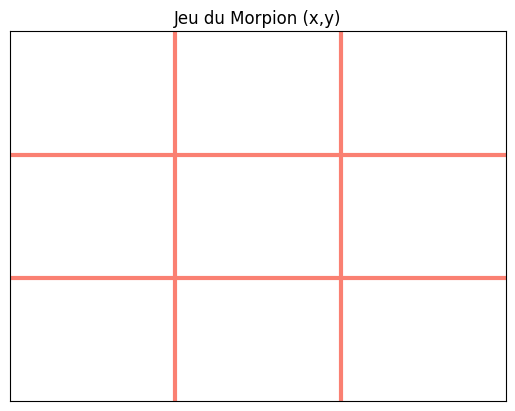

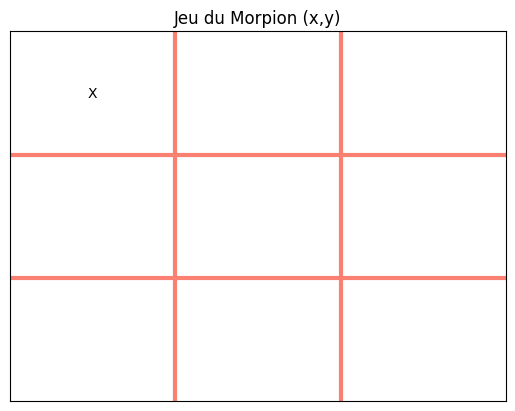

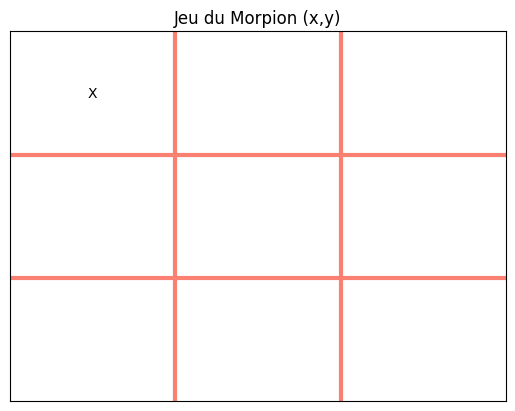

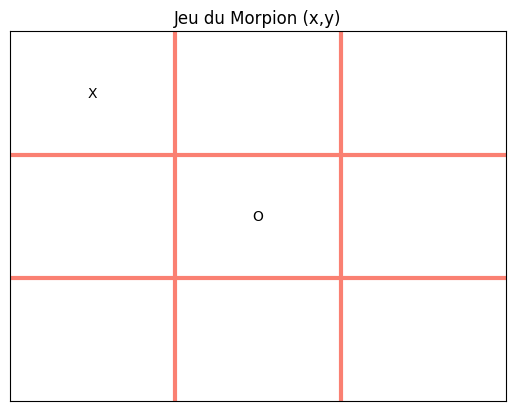

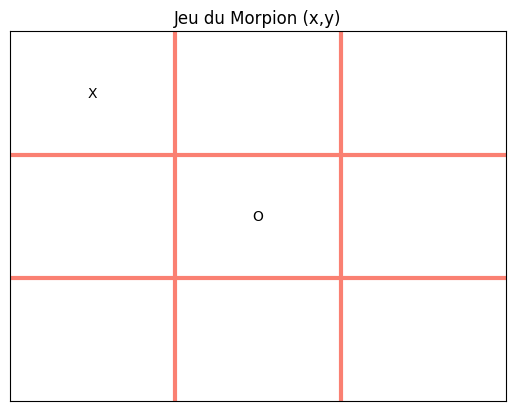

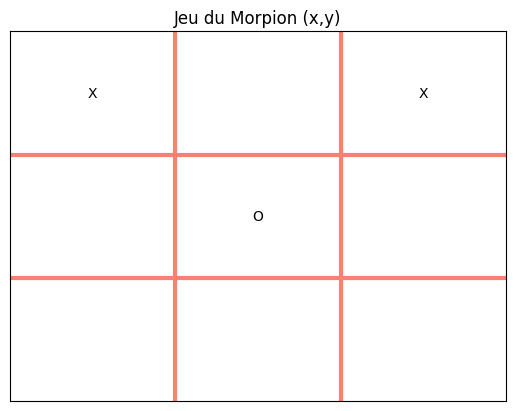

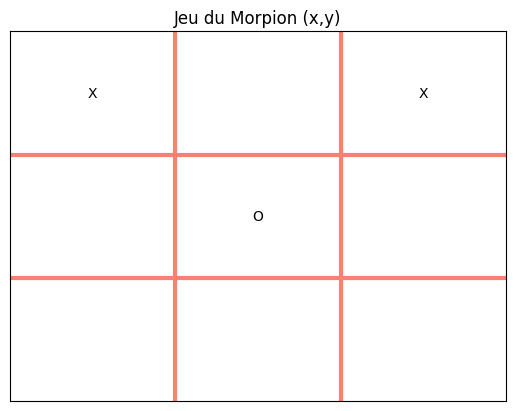

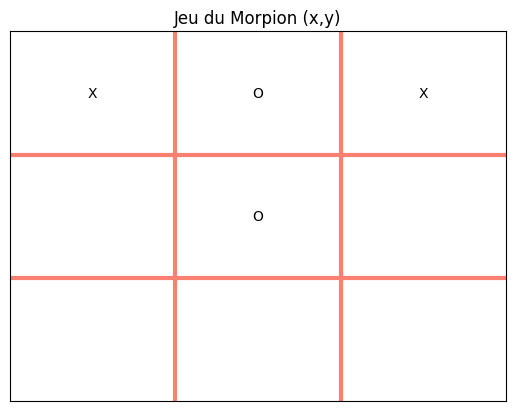

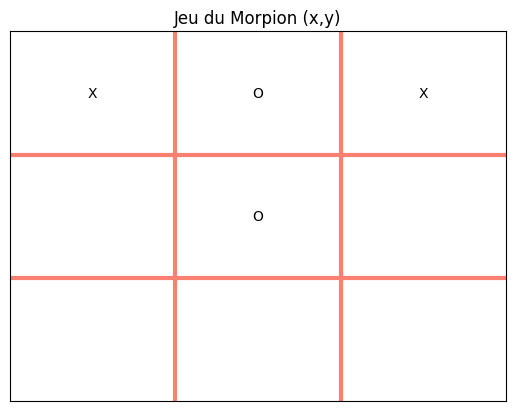

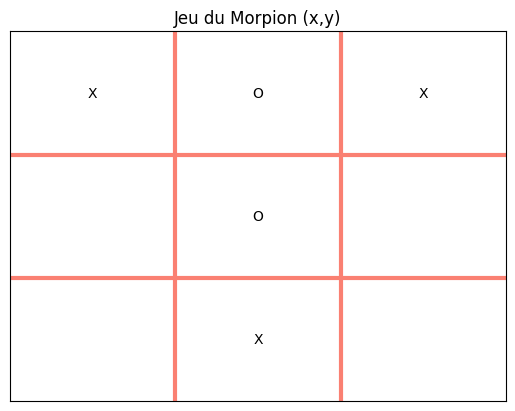

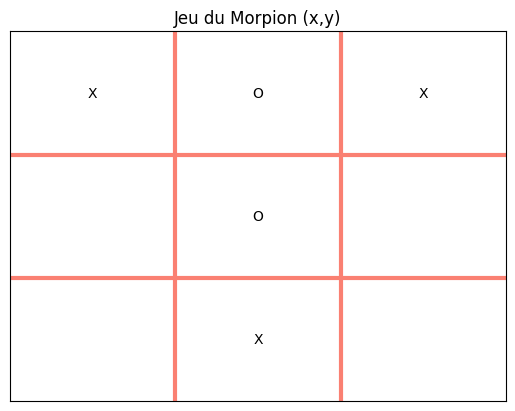

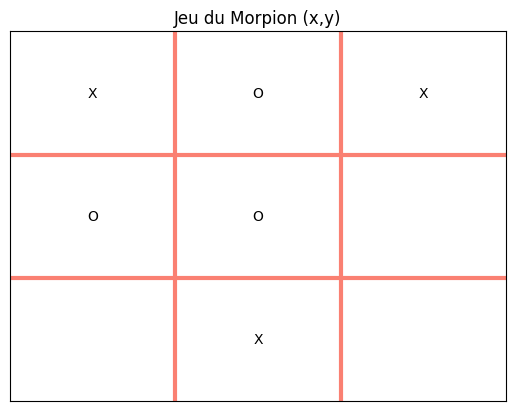

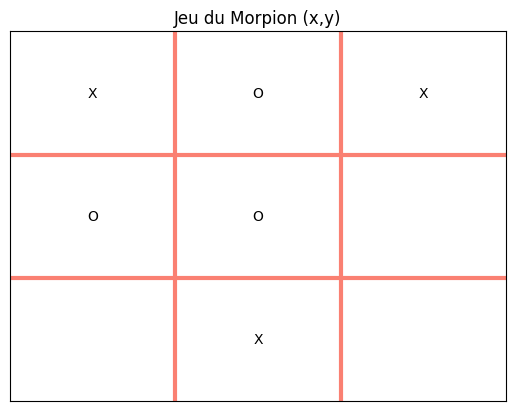


Erreur de saisie: case déjà occupée, choississez en une autre !


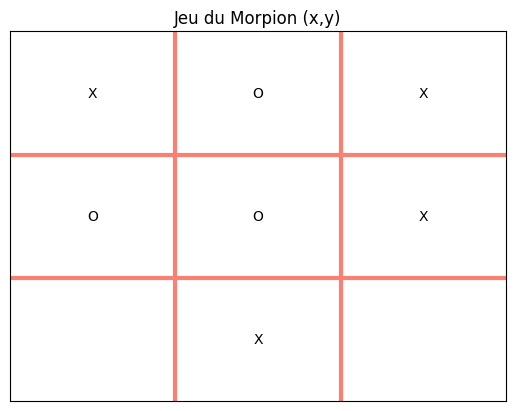

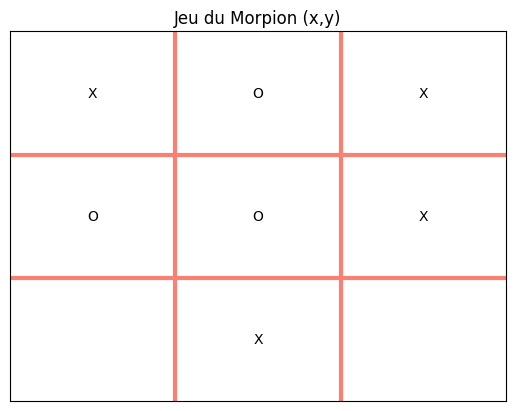


Erreur de saisie: format incorrect,  exemple 1,2 ou 1 2 attendue pour les coordonnées !


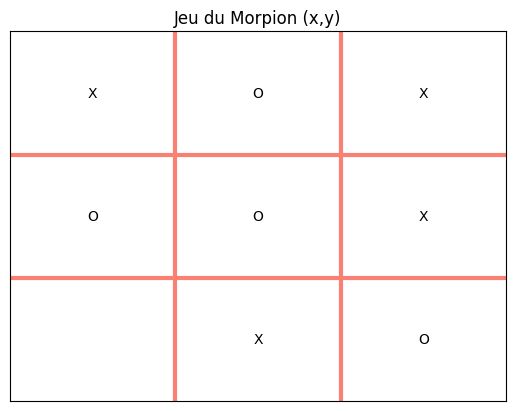

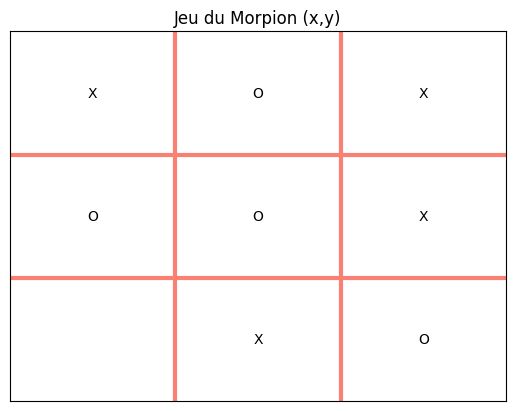

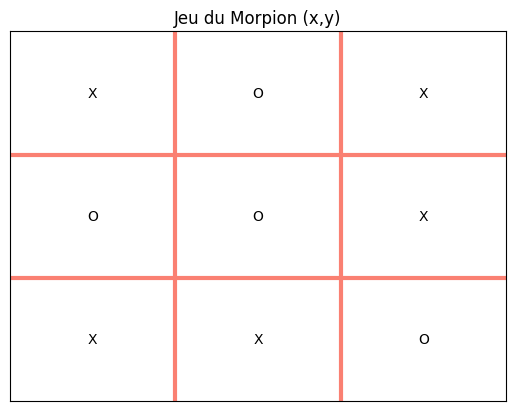

Match nul oops !


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def afficher_grille(grille):
    # Affichage grille 3x3 (tableau 3x3 Numpy en entrée)
    # Efface le contenu de la figure actuelle
    plt.clf()
    plt.title("Jeu du Morpion (x,y)")

    # On crée grille pour pouvoir dessiner dessus
    grille_jeu = plt.gca()

    # Definition des limites de la grille de 0 à 3 pour les axes x et y
    grille_jeu.set_xlim(0,3)
    grille_jeu.set_ylim(0,3)

    # On efface les ticks marques sur les axes 
    grille_jeu.set_xticks([])
    grille_jeu.set_yticks([])

    # Dessin de la grille, on trace deux lignes verticales et deux lignes horizontales avec .plot
    # Pour i de 1 à 2
    for i in range(1,3):
        grille_jeu.plot([i,i],[0,3], lw=3, color='salmon') # Lignes verticales grille entre (i,0) et (i,3) on se deplace le long de x
        grille_jeu.plot([0,3],[i,i], lw=3, color='salmon') # Lignes horizontales grille entre (0,i) et (3,i) on se deplace le long de y

    # Affichage des marques X et O aux positions correspondantes
    for ligne in range(3): # On parcout l'axe y pour les lignes 
        for colonne in range(3): # On parcourt l'axe x pour les colonnes
            marque = grille[ligne, colonne] # Marque de la case X ou O ou ''

            if marque != "": # Si la case n'est pas vide
                # Calcul des positions d'affcihages
                # Les centres des cases sont 0.5 1.5 et 2.5
                x = colonne + 0.5 
                y = 2.5 - ligne # matplotlib compte de bas en haut pour l'affichage j'inverse donc l'axe Y

                grille_jeu.text(x,y,marque,ha='center',va='center')
    # Affichage de la grille modifiée
    plt.show()

def recuperer_coordonnees(grille, joueur):
    # Demande aux joueurs de saisir les coordonnées (ligne, colonne) puis les retourne si la saisie est conforme
    print("")
    while True:
        try:
            # Demande de saisi des coordonnées pour le "X" ou le "O"
            entree = input(f"Joueur {joueur}, entrez 'ligne colonne' : ").strip() # .strip() supprime les espaces invisibles avant et ou après le contenu saisi

            # on test si la saisi est au format x y ou x,y où x et y peuvent etre egaux à 1,2 ou 3
            if "," in entree:
                coup = entree.split(",") # Suppression de la virgule
            else:                                  # ou
                coup = entree.split() # Suppression de l'espace

            # Verification qu'il n'y a que deux valeurs
            if len(coup) != 2:
                print("Erreur de saisie: format incorrect,  exemple 1,2 ou 1 2 attendue pour les coordonnées !")
                continue
            
            # Convertir en entier et moins 1 car on commence à zero alors qu'on demande entre 1 et 3 a la saisi
            ligne = int(coup[0]) - 1
            colonne = int(coup[1]) - 1

            # Verification que la position saisie aprés conversion existe dans la grille de (0,0) (2,2)
            if not(0<=ligne<=2 and 0<=colonne<=2):
                print("Erreur de saisie: coordonnées invalides, valeurs de 1 à 3 attendues !")
                continue

            # Vérification que la case est libre
            if grille[ligne, colonne] != "":
                print("Erreur de saisie: case déjà occupée, choississez en une autre !")
                continue

            return ligne, colonne
        except ValueError:
            print("Erreur de saisie: veuillez entrer deux nombres entiers entre 1 et 3 !")

def placer_marque(grille, ligne, colonne, joueur):
    # Rempli le tableau numpy contenant notre jeu avec X ou O en fonction du joueur actif
    grille[ligne, colonne] = joueur

def verifier_victoire(grille, joueur):
    # On va tester si un joueur a aligné trois X ou O sur une ligne colonne ou diagonale
    # Verification des lignes 
    for y in range(3):
        # Si les trois cases d'une ligne sont egales au symbole du joueur actif
        # [y,:] prend toutes les cases/colonnes de la ligne y ici [y,1] et [y,2] et [y,3] c'est une slice
        if np.all(grille[y, :] == joueur):
            return True # Victoire on retourne True
        
    #Verification des colonnes
    for x in range(3):
        # Si les trois cases d'une colonne sont egales au symbole du joueur actif
        # [y,:] prend toutes les cases/lignes de la colonne x ici [1,x] et [2,x] et [3,x] c'est une slice
        if np.all(grille[:, x] == joueur):
            return True # Victoire on retourne True
    
    # Verification diagonale 1 (0,0) (1,1) (2,2)
    if np.all([grille[i,i] == joueur for i in range(3)]):
        # Test si (0,0) == (1,1) == (2,2) == joueur
            return True
    
    # Verification diagonale 2 (0,2) (1,1) (2,0)
    if np.all([grille[j, 2 - j] == joueur for j in range(3)]):
        # Test si (0,2) == (1,1) == (2,0) == joueur
        return True
    
    # On retourne False si pas de condition de victoire atteinte
    return False

def verifier_match_nul(grille):
    # On test qu'aucun case ne soit vide pour retourne True
    return not np.any(grille == '')

def morpion():
    # Fonction principale du programme

    # Création de la grille initiale 
    grille = np.full((3,3),'', dtype=object)

    # Ordre des joueurs
    ordre_joueurs = ["X","O"]

    # Compteur de tour pour alterner entre "X" et "O"
    tour = 0

    # Maj auto de l'affichage: mode interactif 
    plt.ion()
    plt.figure(figsize=(5,5))

    afficher_grille(grille)

    while True:
        joueur = ordre_joueurs[tour%2]

        afficher_grille(grille)

        # Saisie des coordonnées du coup par la joueur
        ligne, colonne = recuperer_coordonnees(grille, joueur)

        # On enregistre le coup dans la grille
        placer_marque(grille, ligne, colonne, joueur)

        # Affichage grille modifiée
        afficher_grille(grille)

        # Verification victoire
        if verifier_victoire(grille, joueur):
            print("Victoire du joueur: ", joueur)
            # On sort de la boucle de jeu
            break

        if verifier_match_nul(grille):
            print("Match nul oops !")
            break

        # Changement de tour si toujours pas de nul ou de victoire d'un joueur
        tour += 1

plt.ioff()
plt.show()

morpion()

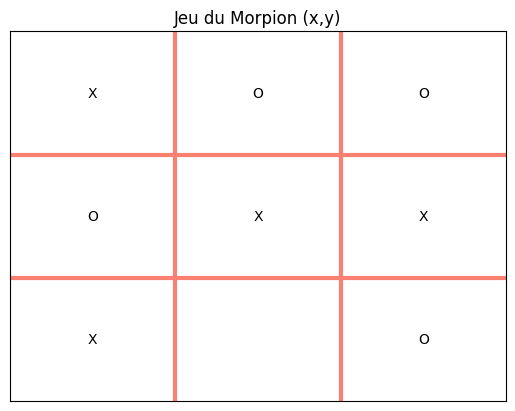

In [36]:
# test affiche_grille
tabtest = np.array([["X","O","O"],["O","X","X"],["X","","O"]], dtype=object)
    
afficher_grille(tabtest)

